In [ ]:
import pandas as pd
import numpy as np
#1.다음 분기에 어떤 게임을 설계해야 할까
#2.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
#3.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
#4.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

#데이터를 통해 얻어야 하는 새로 발매할 게임의 힌트
#장르
#플랫폼
#스타일
#타깃 시장

In [ ]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
##전 처 리##

In [ ]:
#단위 수정  
#M이 붙어있는 숫자 : M만 제거
df['NA_Sales'] = df['NA_Sales'].str.replace('M', '')
df['EU_Sales'] = df['EU_Sales'].str.replace('M', '')
df['JP_Sales'] = df['JP_Sales'].str.replace('M', '')
df['Other_Sales'] = df['Other_Sales'].str.replace('M', '')

#K가 붙어있는 숫자 : 000을 붙여준 뒤 다시 100이 넘는 수를 1000000으로 나눠 줄 예정
df['NA_Sales'] = df['NA_Sales'].str.replace('K', '000')
df['EU_Sales'] = df['EU_Sales'].str.replace('K', '000')
df['JP_Sales'] = df['JP_Sales'].str.replace('K', '000')
df['Other_Sales'] = df['Other_Sales'].str.replace('K', '000')
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(pd.to_numeric) #문자들을 정수로 바꿔줬다.

In [ ]:
#K가 들어가서 숫자가 커진 판매량 들을 1000000으로 나눠서 #.## 처럼 맞춰주었다.
#NA_Sales
for i, row in df.iterrows() :     # i 는 df 안의 요소이며
    if df.at[i,'NA_Sales'] < 1000 :   # NA_Sales 칼럼안의 i 가 1000보다 크다면
      df.at[i,'NA_Sales'] = df.at[i,'NA_Sales']   # NA_Sales 칼럼안의 i 는 NA_Sales 칼럼안의 i이다 !!!! 
    else :                                          #만약 df.at[i,'NA_Sales'] 가 1000보다 작지 않다면
      df.at[i,'NA_Sales'] = df.at[i,'NA_Sales']*0.000001   # df.at[i,'NA_Sales'] 를 1000000로 나눠라 (K 를 변환하면서 1000이 붙은 자료들은 M단위 자료보다 한참 크기 때문에 변환가능)
#EU_Sales
for i, row in df.iterrows() :
    if df.at[i,'EU_Sales'] < 1000 :
      df.at[i,'EU_Sales'] = df.at[i,'EU_Sales']
    else :
      df.at[i,'EU_Sales'] = df.at[i,'EU_Sales']*0.000001
#JP_Sales
for i, row in df.iterrows() :
    if df.at[i,'JP_Sales'] < 1000 :
      df.at[i,'JP_Sales'] = df.at[i,'JP_Sales']
    else :
      df.at[i,'JP_Sales'] = df.at[i,'JP_Sales']*0.000001
#Other_Sales
for i, row in df.iterrows() :
    if df.at[i,'Other_Sales'] < 1000 :
      df.at[i,'Other_Sales'] = df.at[i,'Other_Sales']
    else :
      df.at[i,'Other_Sales'] = df.at[i,'Other_Sales']*0.000001

In [ ]:
# 전세계 판매량 컬럼 생성
df['G_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [ ]:
#연도변경 (한자리 두자리수로 표기된 연도 변경하기)
for i, row in df.iterrows() :
    if 1970 < df.at[i,'Year'] < 2021 :
      df.at[i,'Year'] = df.at[i,'Year']
    elif 40 < df.at[i,'Year'] < 99 :
      df.at[i,'Year'] = df.at[i,'Year'] + 1900
    elif 0 <= df.at[i,'Year'] < 22 :
      df.at[i,'Year'] = df.at[i,'Year'] + 2000

In [ ]:
#결측값 제거후 연도 정수로 변경
df = df.dropna()
df['Year'] = df['Year'].astype(int)

In [ ]:
#조사기간, 게임 개수 확인
Newest = df['Year'].max()
print('Newest : ',Newest)
Oldist = df['Year'].min()
print('Oldist : ',Oldist)
Samples = df.shape[0]
print('Identified Samples :', Samples)
print('Numbers_of_Genre : ', 12, '(Misc included)')

Newest :  2020
Oldist :  1980
Identified Samples : 16241
Numbers_of_Genre :  12 (Misc included)


In [ ]:
#시대별로 변화가 있는지 알아보기 위해 1980-1990, 1991-2000, 2001-2010, 2011-2021 까지의 10년단위로 데이터프레임 생성
#80년대
e80s = df[df.Year <1991]
#90년대
e90s = df[df.Year <2001]
e90s = e90s[e90s.Year >1990]
#2000년대
e00s = df[df.Year <2011]
e00s = e00s[e00s.Year >2000]
#2010년대
e10s = df[df.Year <2021]
e10s = e10s[e10s.Year >2010]

In [ ]:
####데이터 분석 ####

#데이터를 통해 얻어야 하는 새로 발매할 게임의 요소
#장르
#플랫폼
#스타일
#타깃 시장

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#시대별 가장 많이 팔린 게임
Top_5_80s = e80s.sort_values(by= 'G_Sales',axis= 0,ascending = False).head(5) #df.sort_values(by= 'G_Sales',axis= 0,ascending = False) ('G_Sales', 컬럼기준으로, 큰수에서 작은수로 정렬)
Top_5_90s = e90s.sort_values(by= 'G_Sales',axis= 0,ascending = False).head(5)
Top_5_00s = e00s.sort_values(by= 'G_Sales',axis= 0,ascending = False).head(5)
Top_5_10s = e10s.sort_values(by= 'G_Sales',axis= 0,ascending = False).head(5)

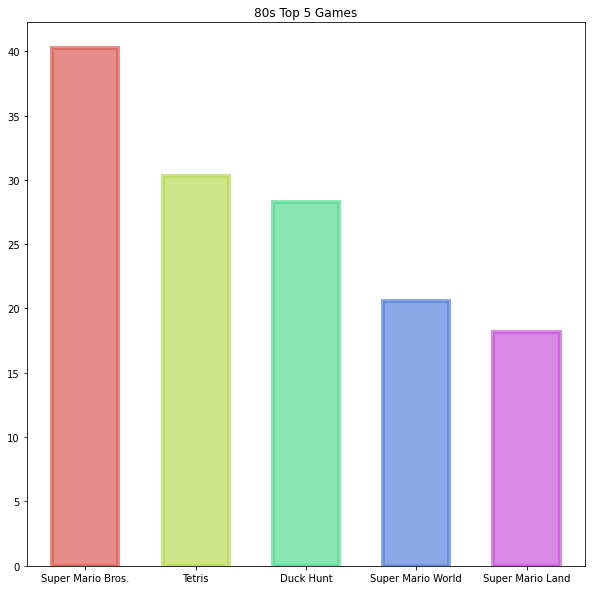

In [ ]:
#80년대
plt.figure(figsize=(10,10))
colors4 = sns.color_palette('hls',5) # 색상 자동 생성 ('hls'팔레트에서, 만큼)
plt.title('80s Top 5 Games')
plt.bar(Top_5_80s['Name'],Top_5_80s['G_Sales'],0.6,color= colors4, edgecolor= colors4, alpha=0.7, linewidth=4);


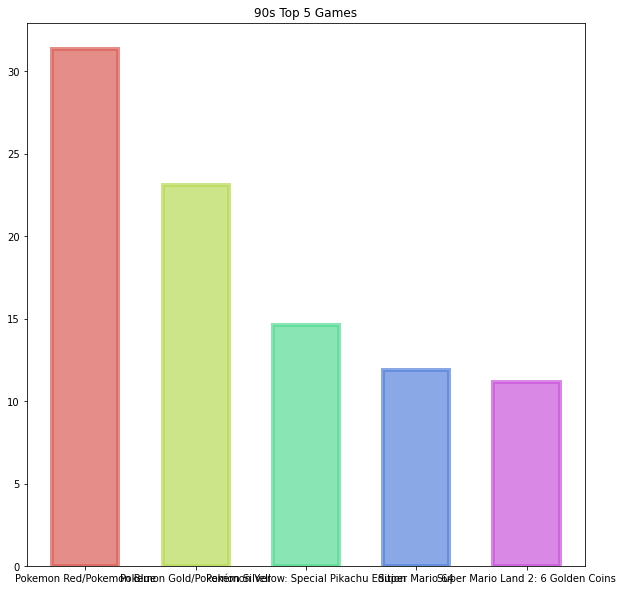

In [ ]:
#90년대
plt.figure(figsize=(10,10))
colors4 = sns.color_palette('hls',5) # 색상 자동 생성 ('hls'팔레트에서, len(Top_5['Name']만큼)
plt.title('90s Top 5 Games')
plt.bar(Top_5_90s['Name'],Top_5_90s['G_Sales'],0.6,color= colors4, edgecolor= colors4, alpha=0.7, linewidth=4);


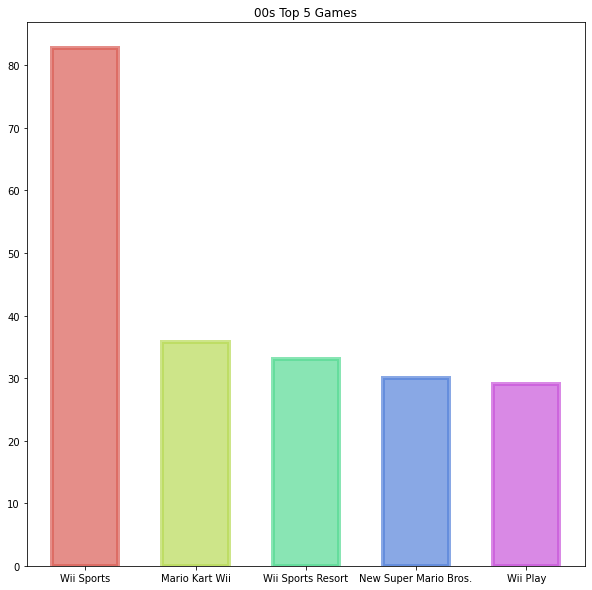

In [ ]:
#2000년대
plt.figure(figsize=(10,10))
colors4 = sns.color_palette('hls',5) # 색상 자동 생성 ('hls'팔레트에서, len(Top_5['Name']만큼)
plt.title('00s Top 5 Games')
plt.bar(Top_5_00s['Name'],Top_5_00s['G_Sales'],0.6,color= colors4, edgecolor= colors4, alpha=0.7, linewidth=4);

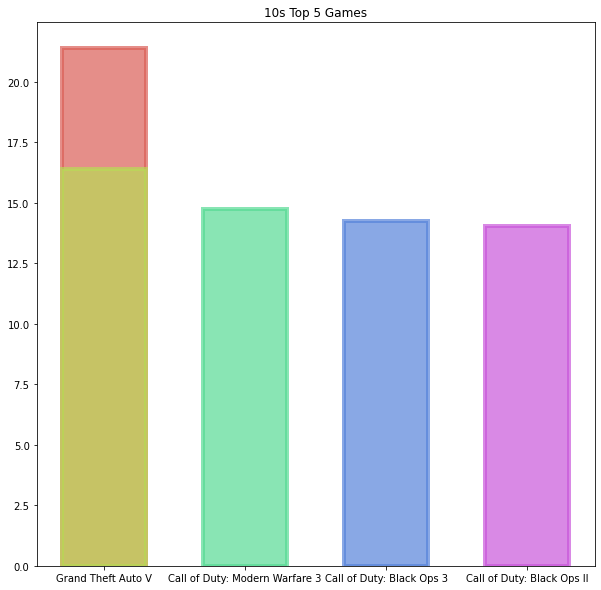

In [ ]:
#2010년대
plt.figure(figsize=(10,10))
colors4 = sns.color_palette('hls',5) # 색상 자동 생성 ('hls'팔레트에서, len(Top_5['Name']만큼)
plt.title('10s Top 5 Games')
plt.bar(Top_5_10s['Name'],Top_5_10s['G_Sales'],0.6,color= colors4, edgecolor= colors4, alpha=0.7, linewidth=4);

In [ ]:
#올타임 판매량 기준
#Top 5 & 시각화
Top_5 = df.sort_values(by= 'G_Sales',axis= 0,ascending = False).head(5) #df.sort_values(by= 'G_Sales',axis= 0,ascending = False) ('G_Sales', 컬럼기준으로, 큰수에서 작은수로 정렬)

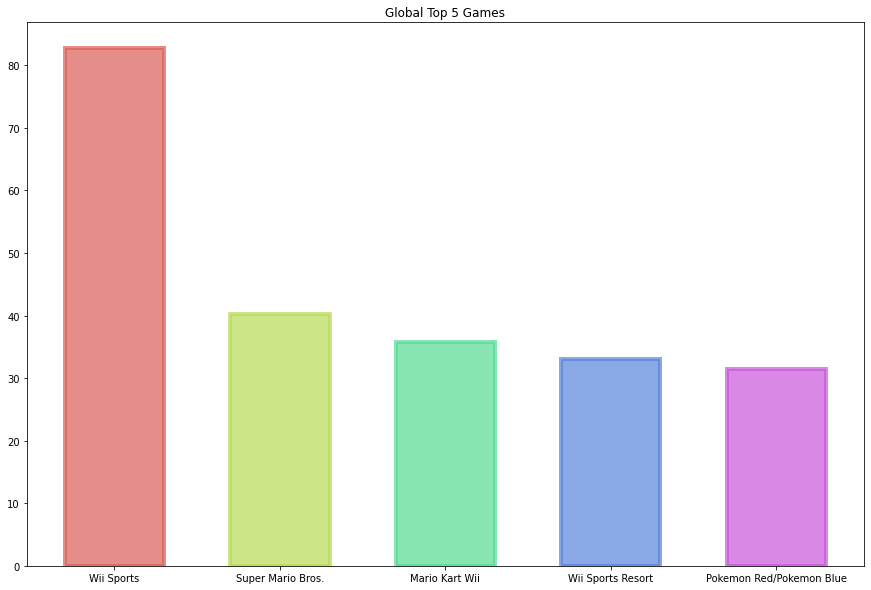

In [ ]:
plt.figure(figsize=(15,10))
colors = sns.color_palette('hls',len(Top_5['Name'])) # 색상 자동 생성 ('hls'팔레트에서, len(Top_5['Name']만큼)
plt.title('Global Top 5 Games')
plt.bar(Top_5['Name'],Top_5['G_Sales'],0.6,color= colors, edgecolor= colors, alpha=0.7, linewidth=4);

In [ ]:
#Top 10 시각화
Top_10 = df.sort_values(by= 'G_Sales',axis= 0,ascending = False).head(10)

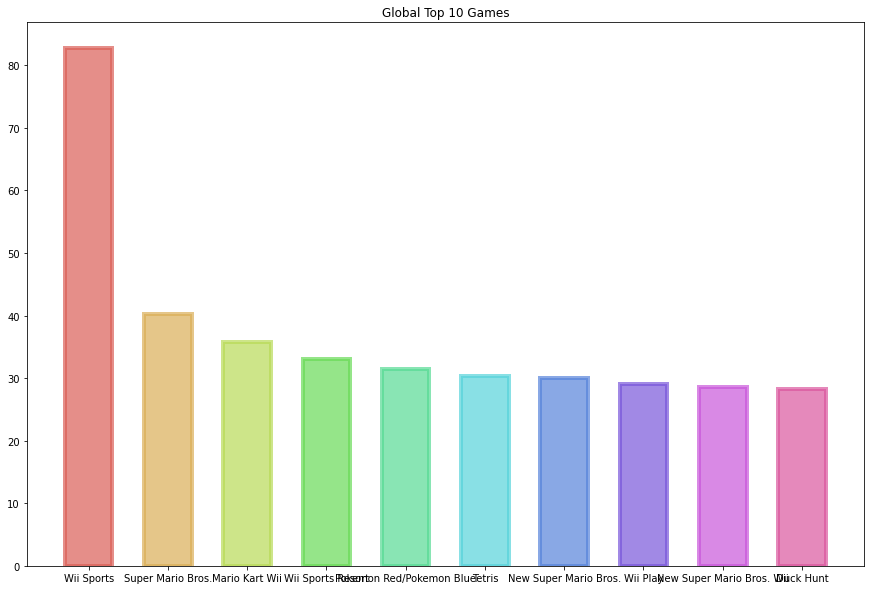

In [ ]:
plt.figure(figsize=(15,10))
colors2 = sns.color_palette('hls',len(Top_10['Name'])) # 색상 자동 생성 ('hls'팔레트에서, len(Top_10['Name']만큼)
plt.title('Global Top 10 Games')
plt.bar(Top_10['Name'],Top_10['G_Sales'],0.6,color= colors2, edgecolor= colors2, alpha=0.7, linewidth=4);

In [ ]:
#위의 시대별 판매량 그래프로 알수 있는 사실 2가지

#첫번째
#최근 10년간은 메가히트 오픈월드액션게임 GTA5 & FPS게임 콜오브듀티 판매량이 두드러졌다.
#이는 모든 기종을 아우르는 메가히트 게임의 힘을 보여준것이다.
#오픈월드 액션게임과 FPS슈팅게임은 높은 기술력과 많은 투자가 수반된다.
#고비용 고 효율인 샘
#최근 사이버펑크의 실패를 봤을 때 쉽게 성공하기 힘든 시장

#두번쨰
#모든 시대를 관통하는 마리오의 저력
#2010년대에도 마리오시리즈인 마리오 카트는7위에 랭크 된것을 알 수 있다.

In [ ]:
#모든시대의 top 5 결과에서 공통적으로 보이는 키워드는 Mario
#마리오가 들어간 게임 찾기
Mario = df[df['Name'].str.contains('Mario')] #마리오를 포함하는 열만 찾기
print('Mario first published : ', Mario['Year'].min())
print('Mario IP games : ',Mario.shape[0])
print('Mario IP total sales : ', Mario['G_Sales'].sum(), '(5억5천5백2십8만)')

Mario first published :  1982
Mario IP games :  112
Mario IP total sales :  555.28 (5억5천5백2십8만)


In [ ]:
print(round(112 / 16241,3))
print(round(555.28/8755.0,3))

0.007
0.063


In [ ]:
#조사대상전체에 0.7퍼센트에 불과한 마리오게임들
#하지만 전체 게임 판매량의 6.3 퍼센트인 555.28M 장을 판매함

#마리오 이외에도 Wii 스포츠등 직관적이고 쉬운 조작을 요하는 게임들의 판매량이 높았다.
#마리오의 특징 : 친근하고 귀여운 캐릭터, 잔인하지않음, 닌텐도라는 강력한 플랫폼을 가지고 있음, 쉽게조작할 수 있지만, 완벽하게 숙달하긴 어렵다.
#이를 통해 개발해야할 새로운 게임이 가져야할 특징.


#Hint1 :
#1. 대중적이고 접근하기 편해야 한다.
#2. Easy to learn, hard to master
#3. 접근하기 좋은 플랫폼중 하나여야 한다.

In [ ]:
### 지역별 선호장르의 차이가 있는가 ###

In [ ]:
#지역별 장르로 구분
Genre = df[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'G_Sales']].groupby('Genre').sum()      # .groupby('Genre').sum()그룹으로 나눠서 각각의 합을 더했다.
#지역별 시장 규모 파악하기
print('Market size of NA : ', Genre['NA_Sales'].sum().round(0))
print('Market size of EU : ', Genre['EU_Sales'].sum().round(0))
print('Market size of JP : ', Genre['JP_Sales'].sum().round(0))
print('Market size of Others : ', Genre['Other_Sales'].sum().round(0))
print('Total market size :', Genre['G_Sales'].sum().round(0))

Market size of NA :  4307.0
Market size of EU :  2394.0
Market size of JP :  1271.0
Market size of Others :  783.0
Total market size : 8755.0


In [ ]:
#지역 시대별 장르로 구분
Genre80 = e80s[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'G_Sales']].groupby('Genre').sum()
Genre90 = e90s[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'G_Sales']].groupby('Genre').sum()
Genre00 = e00s[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'G_Sales']].groupby('Genre').sum()
Genre10 = e10s[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'G_Sales']].groupby('Genre').sum()

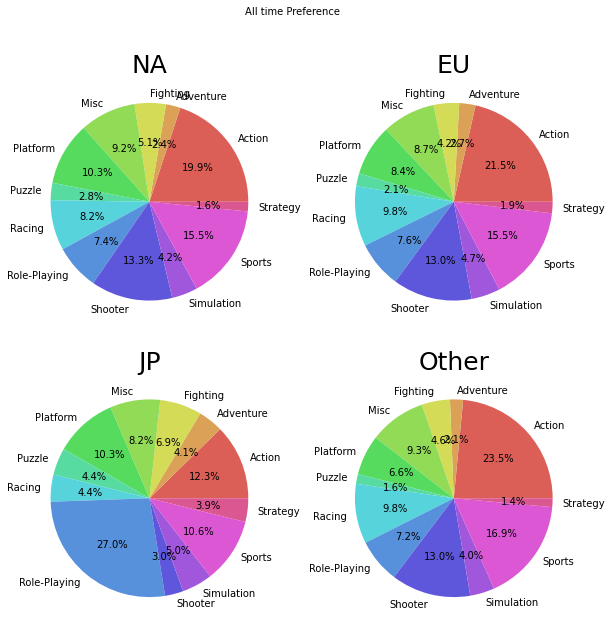

In [ ]:
#지역 그리고 장르간의 점유율 보기
plt.figure(figsize=(10,10))

BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE) # controls default text sizes
plt.rc('axes', titlesize=25) # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

colors3 = sns.color_palette('hls',Genre.shape[0])
labels = Genre.index
plt.suptitle('All time Preference')



plt.subplot(221).set_title('NA')
plt.pie(Genre['NA_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(222).set_title('EU')
plt.pie(Genre['EU_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(223).set_title('JP')
plt.pie(Genre['JP_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(224).set_title('Other')
plt.pie(Genre['Other_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

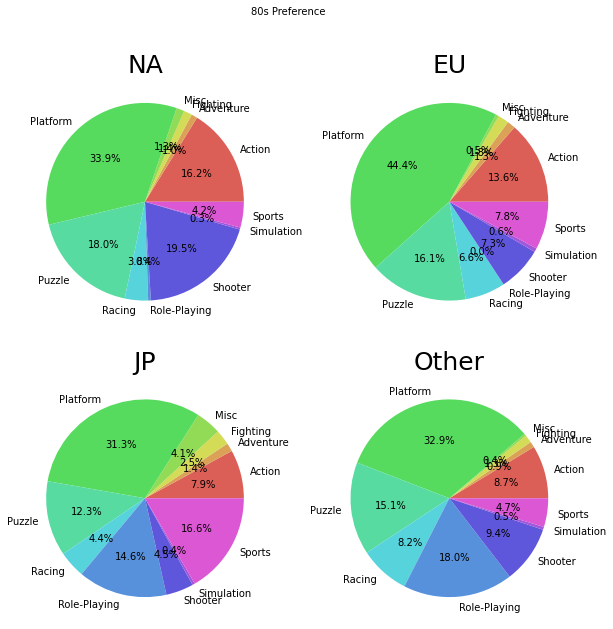

In [ ]:
plt.figure(figsize=(10,10))

BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE) # controls default text sizes
plt.rc('axes', titlesize=25) # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

colors3 = sns.color_palette('hls',Genre.shape[0])
labels = Genre80.index
plt.suptitle('80s Preference')

plt.subplot(221).set_title('NA')
plt.pie(Genre80['NA_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(222).set_title('EU')
plt.pie(Genre80['EU_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(223).set_title('JP')
plt.pie(Genre80['JP_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(224).set_title('Other')
plt.pie(Genre80['Other_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

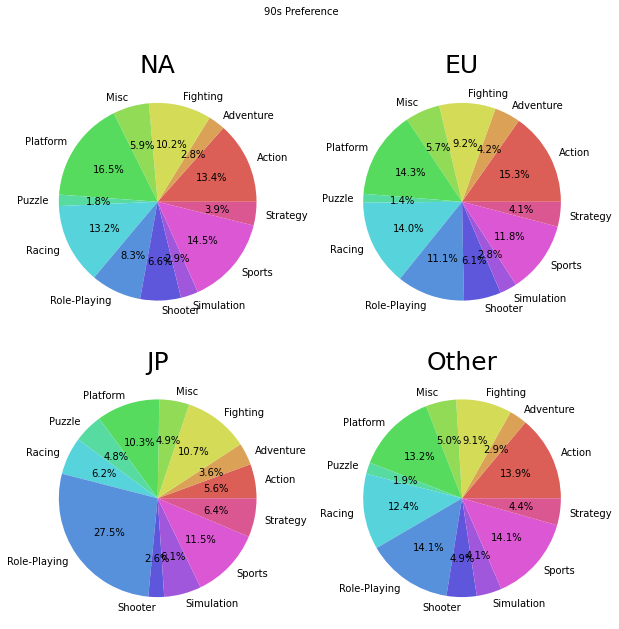

In [ ]:
plt.figure(figsize=(10,10))

BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE) # controls default text sizes
plt.rc('axes', titlesize=25) # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

colors3 = sns.color_palette('hls',Genre.shape[0])
labels = Genre90.index
plt.suptitle('90s Preference')

plt.subplot(221).set_title('NA')
plt.pie(Genre90['NA_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(222).set_title('EU')
plt.pie(Genre90['EU_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(223).set_title('JP')
plt.pie(Genre90['JP_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(224).set_title('Other')
plt.pie(Genre90['Other_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

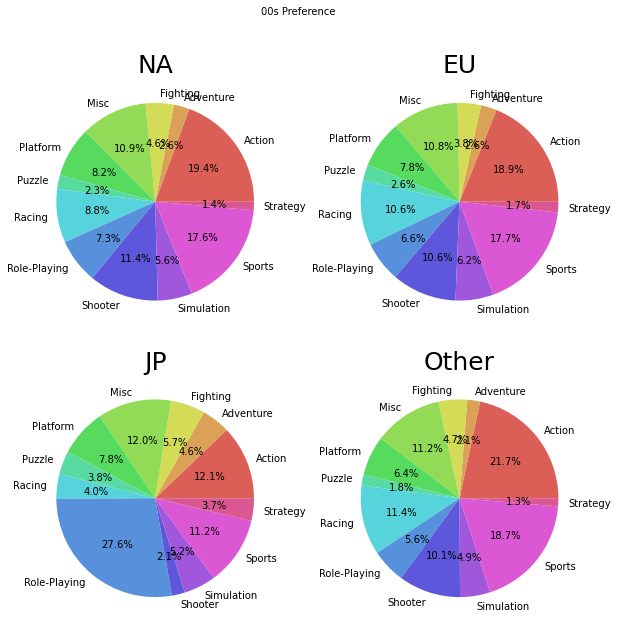

In [ ]:
plt.figure(figsize=(10,10))

BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE) # controls default text sizes
plt.rc('axes', titlesize=25) # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

colors3 = sns.color_palette('hls',Genre.shape[0])
labels = Genre00.index
plt.suptitle('00s Preference')

plt.subplot(221).set_title('NA')
plt.pie(Genre00['NA_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(222).set_title('EU')
plt.pie(Genre00['EU_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(223).set_title('JP')
plt.pie(Genre00['JP_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(224).set_title('Other')
plt.pie(Genre00['Other_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

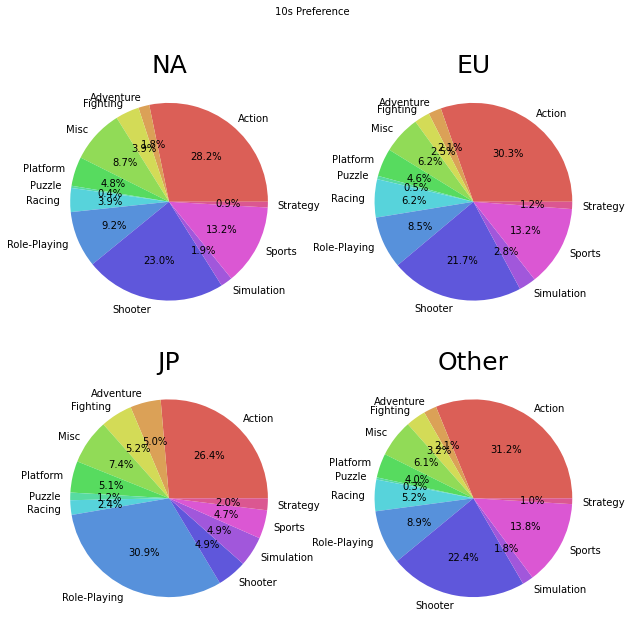

In [ ]:
plt.figure(figsize=(10,10))

BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE) # controls default text sizes
plt.rc('axes', titlesize=25) # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

colors3 = sns.color_palette('hls',Genre.shape[0])
labels = Genre10.index
plt.suptitle('10s Preference')

plt.subplot(221).set_title('NA')
plt.pie(Genre10['NA_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(222).set_title('EU')
plt.pie(Genre10['EU_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(223).set_title('JP')
plt.pie(Genre10['JP_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

plt.subplot(224).set_title('Other')
plt.pie(Genre10['Other_Sales'], labels=labels, autopct='%.1f%%',colors=colors3);

In [ ]:
#게임산업의 초창기인 80년대에는 네 지역 모두 비슷정도의 점유율 분포를 볼 수 있었다.
#기술의 한계로인해 구현 가능한 게임들이 조작으로 플레이 가능한 플랫폼, 슈팅, 퍼즐 장르등에 편중 되어 있었다.

#그후
#90년대와 2000년대에 들어 다양한장르의 게임들이 균형있게 시장을 점유하고 있었다.
#그래프로 볼 수 있는 커다란 흐름은 시대가 지남에 따라 슈팅과 액션게임의 시장점유율이 눈에 보이게 성장했다.(일본을 제외하고)
#이 시기부터 일본과 다른 시장간의 장르별 점유율 편차가 나타나기 시작한다.
#일본은 롤플레잉 게임의 점유율이 급 상승(드래곤 퀘스트, 파이널 판타지등의 JRPG 게임의 히트 때문)


#2010년대에 들어 기술의 발전으로 더 사실적인 조작감과 그래픽으로 무장한 액션과 슈팅게임의 약진이 두드러지게 나타났다.
#이런 현상이 발생한 이유는 기술적인 발전이 가장 클 것이다.
#기술의 발전 덕분에 과거에는 영화에서만 볼 수 있던 수많은 장면들이 이제는 게임으로 더욱더 구현이 된다.
#매우 사실적인 그래픽을 입은 게임들을 실제로 조작하며 더욱 커다란 몰입감을 느낄 수 있다.


#hint 2 :새로운 게임을 만든다면 장르는 액션 혹은 슈팅이 되어야 할 것이다. 아니면 이런 기술적 배경을 충분히 활용한 몰입도 있는 게임이 되어야할것이다.
#위 요소를 충족하면 시장은 일본만 아니라면 좋을것이다.

In [ ]:
#연도별 트렌드를 알아보자

Trend = df[['Genre','Year','G_Sales']] # 출고량
# 연도 장르 판매량으로 피벗테이블을 만들어줬다(aggfunc=sum) 중요(각 판매량(value)들을 누적해서 더해줬다.)
Trend = pd.pivot_table(Trend,index='Year',columns='Genre',values='G_Sales',aggfunc=sum).fillna(0) 
Trend2 =pd.crosstab(df['Year'], df['Genre']) # 퍼블리싱량


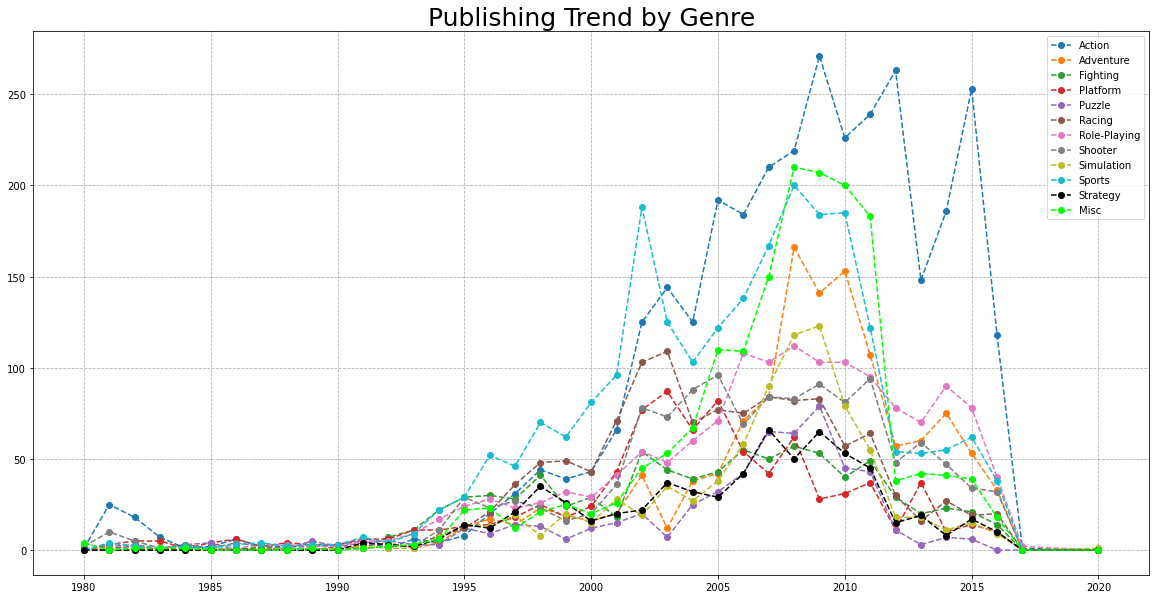

In [ ]:
#퍼블리싱 기준 트렌드

fig = plt.figure(figsize=(20,10))

x = Trend2.index

plt.plot(x,Trend2['Action'], label='Action', marker='o', linestyle='--');
plt.plot(x,Trend2['Adventure'], label='Adventure', marker='o', linestyle='--');
plt.plot(x,Trend2['Fighting'], label='Fighting', marker='o', linestyle='--');
plt.plot(x,Trend2['Platform'], label='Platform', marker='o', linestyle='--');
plt.plot(x,Trend2['Puzzle'], label='Puzzle', marker='o', linestyle='--');
plt.plot(x,Trend2['Racing'], label='Racing', marker='o', linestyle='--');
plt.plot(x,Trend2['Role-Playing'], label='Role-Playing', marker='o', linestyle='--');
plt.plot(x,Trend2['Shooter'], label='Shooter', marker='o', linestyle='--');
plt.plot(x,Trend2['Simulation'], label='Simulation', marker='o', linestyle='--');
plt.plot(x,Trend2['Sports'], label='Sports', marker='o', linestyle='--');
plt.plot(x,Trend2['Strategy'], label='Strategy', marker='o', linestyle='--',color='k');
plt.plot(x,Trend2['Misc'], label='Misc', marker='o', linestyle='--',color= 'lime');
plt.grid(linestyle='--')
plt.legend(loc='best', ncol=1);
plt.title('Publishing Trend by Genre');

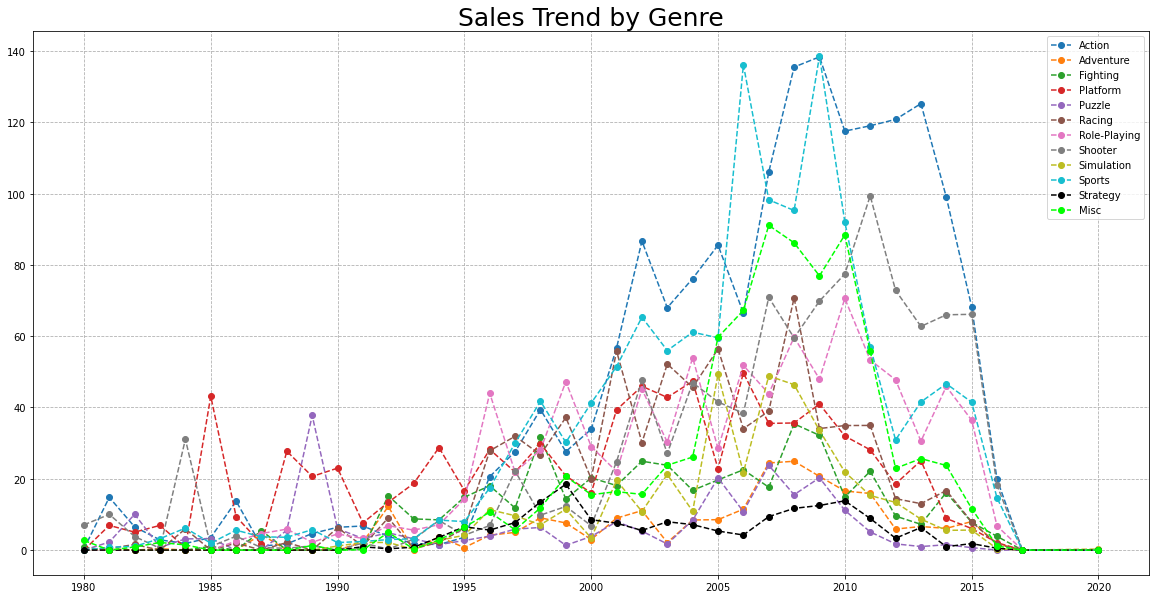

In [ ]:
#출고량 기준 트렌드

fig = plt.figure(figsize=(20,10))

x1 = Trend.index

plt.plot(x1,Trend['Action'], label='Action', marker='o', linestyle='--');
plt.plot(x1,Trend['Adventure'], label='Adventure', marker='o', linestyle='--');
plt.plot(x1,Trend['Fighting'], label='Fighting', marker='o', linestyle='--');
plt.plot(x1,Trend['Platform'], label='Platform', marker='o', linestyle='--');
plt.plot(x1,Trend['Puzzle'], label='Puzzle', marker='o', linestyle='--');
plt.plot(x1,Trend['Racing'], label='Racing', marker='o', linestyle='--');
plt.plot(x1,Trend['Role-Playing'], label='Role-Playing', marker='o', linestyle='--');
plt.plot(x1,Trend['Shooter'], label='Shooter', marker='o', linestyle='--');
plt.plot(x1,Trend['Simulation'], label='Simulation', marker='o', linestyle='--');
plt.plot(x1,Trend['Sports'], label='Sports', marker='o', linestyle='--');
plt.plot(x1,Trend['Strategy'], label='Strategy', marker='o', linestyle='--',color='k');
plt.plot(x1,Trend['Misc'], label='Misc', marker='o', linestyle='--',color= 'lime');
plt.legend(loc='best', ncol=1);
plt.grid(linestyle='--')
plt.title('Sales Trend by Genre');

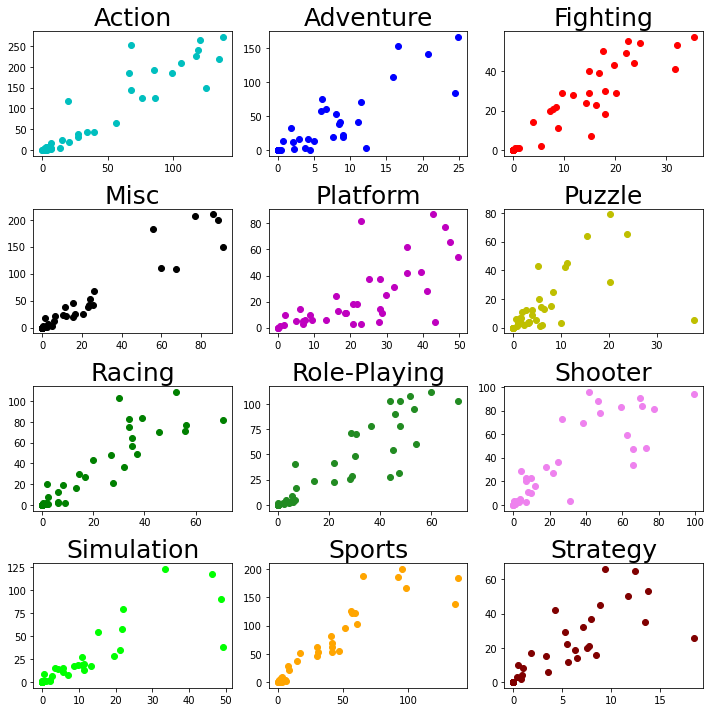

In [ ]:
#Sales 와 퍼블리싱간의 상관관계를 구하기 위해 산점도를 그려봤다.

import matplotlib as mpl

plt.rcParams["figure.figsize"] = (10,10)      #플롯사이즈
colors4 = sns.color_palette('hls',12)
fig, ax = plt.subplots(4, 3)                  #서브플롯갯수

#서브플롯 위치지정밑 그리기
ax[0, 0].scatter(Trend['Action'], Trend2['Action'],c='c');
ax[0, 1].scatter(Trend['Adventure'], Trend2['Adventure'], c='b');
ax[0, 2].scatter(Trend['Fighting'], Trend2['Fighting'], c='r');
ax[1, 0].scatter(Trend['Misc'], Trend2['Misc'], c='k');
ax[1, 1].scatter(Trend['Platform'], Trend2['Platform'], c='m');
ax[1, 2].scatter(Trend['Puzzle'], Trend2['Puzzle'], c='y');
ax[2, 0].scatter(Trend['Racing'], Trend2['Racing'], c='g');
ax[2, 1].scatter(Trend['Role-Playing'], Trend2['Role-Playing'], c='forestgreen');
ax[2, 2].scatter(Trend['Shooter'], Trend2['Shooter'], c='violet');
ax[3, 0].scatter(Trend['Simulation'], Trend2['Simulation'], c='lime');
ax[3, 1].scatter(Trend['Sports'], Trend2['Sports'], c='orange');
ax[3, 2].scatter(Trend['Strategy'], Trend2['Strategy'], c='maroon');

#각 서브플롯 타이틀
ax[0, 0].set_title('Action')
ax[0, 1].set_title('Adventure')
ax[0, 2].set_title('Fighting')
ax[1, 0].set_title('Misc')
ax[1, 1].set_title('Platform')
ax[1, 2].set_title('Puzzle')
ax[2, 0].set_title('Racing')
ax[2, 1].set_title('Role-Playing')
ax[2, 2].set_title('Shooter')
ax[3, 0].set_title('Simulation')
ax[3, 1].set_title('Sports')
ax[3, 2].set_title('Strategy')

#플롯 제목이 위의 플롯과 겹치는것 방지
plt.tight_layout()
plt.show()

In [ ]:
#위의 그래프는 산점도라고 하는 그래프
# 각각 X축은 출고량 Y축은 개발량이다.
#모든 산점도에서 출고량이 증가할수록 개발량 또한 증가한다고 볼 수 있다.
#이는 출고량과 개발량간의 높은 관계가 있다고 볼 수있다.

#hint3.
#즉 최근의 슈팅 액션 스포츠 게임의 상승세를 볼 때 개발해야할 장르는 이 셋 중 하나.
#하지만 높은 라이선싱비용과 개발비용을 고려하면 스포츠 게임은 제외하는걸 추천한다.

In [ ]:
## 플랫폼 정하기 ##

In [ ]:
#연도별 플랫폼 점유율을 보기 위해 크로스탭
#현재 단종된 기기도 있고 최근의 추세만을 보기 위해 2010년부터의 자료만을 다룬다
#또한 같은 기기의 다른버전들은 모두 콘솔 제조사의 이름으로 통합해서 정리한다 ***** 휴대용게임기의 경우는 제조사를 구분하지 않고 통합했다. ******
#이렇게 되면 크게 PC, Play_Station, Nintendo, Microsoft, 휴대용기기 다섯개의 플랫폼을 다룰 수 있다.
Gear = pd.crosstab(df['Year'], df['Platform'])

#2010년 이후 자료만 추출 인덱스가 연도였기때문에 쉽게할수있다.
Gear = Gear.loc[2010:]

#같은 제조사 기기 통합

#밑의 코드에서 3DS를 인식하지 못하기에 DS3로 바꿔줬다.
Gear.rename(columns={'3DS':'DS3'},inplace=True)


#Gear['Play_Station'] = Gear.apply(lambda x: x.PS + x.PS2 + x.PS3 + x.PS4, axis='columns') 해당컬럼의 x값들을 더해 새로운 컬럼을 만든다
Gear['Play_Station'] = Gear.apply(lambda x: x.PS + x.PS2 + x.PS3 + x.PS4, axis='columns')
Gear['Nintendo'] = Gear.apply(lambda x: x.N64 + x.WiiU + x.GC + x.Wii, axis='columns')
Gear['Microsoft'] = Gear.apply(lambda x: x.X360 + x.XB + x.XOne, axis='columns')
Gear['Portable'] = Gear.apply(lambda x: x.DS3 + x.DS + x.PSP + x.PSV, axis='columns')
Gear = Gear[['Play_Station','Nintendo','Microsoft','Portable','PC']]
Gear

Platform,Play_Station,Nintendo,Microsoft,Portable,PC
Year,,,,,
2010,217,253,182,514,87
2011,223,143,205,425,137
2012,147,64,106,274,61
2013,143,54,94,216,38
2014,183,37,125,191,44
2015,209,32,118,202,50
2016,139,10,62,93,38
2017,1,0,0,2,0
2020,0,0,0,1,0


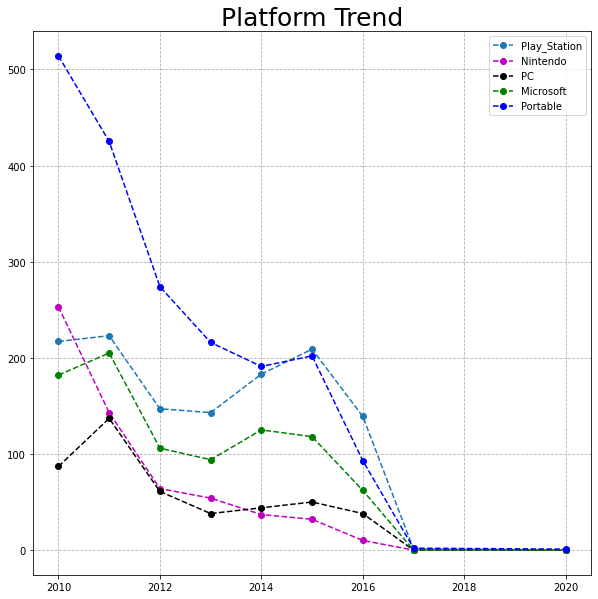

In [ ]:
#위의 데이터를 시각화

fig = plt.figure(figsize=(10,10))

x2 = Gear.index

plt.plot(x2,Gear['Play_Station'], label='Play_Station', marker='o', linestyle='--');
plt.plot(x2,Gear['Nintendo'], label='Nintendo', marker='o', linestyle='--',c='m');
plt.plot(x2,Gear['PC'], label='PC', marker='o', linestyle='--',c='k');
plt.plot(x2,Gear['Microsoft'], label='Microsoft', marker='o', linestyle='--',c='g');
plt.plot(x2,Gear['Portable'], label='Portable', marker='o', linestyle='--',c='b');
plt.legend(loc='best', ncol=1);
plt.title('Platform Trend');
plt.grid(linestyle='--')

In [ ]:
# 2010년도부터 발매되는 게임들이 어떤 플랫폼을 통해 발매되는지를 보여주는 그래프이다.
# 휴대용게임기 시장은 스마트폰의 성장과 맞물려 급격하게 하락세를 맞이하고 있으며
# 2002년 플레이스테이션 2 의 대 성공이후로 소니는 꾸준히 차세대 플레이스테이션을 통해 플랫폼 점유율 1위를 공고히 하고있다.
# 가장 많이 팔리는 게임들을 대거 보유한 닌텐도이지만 새로발매되는 게임의 수가 적다는것은 마리오등 특정 킬러 콘텐츠에대한 편중이 심하다는것으로 볼 수있다.
# 꾸준히 고성능 콘솔기기를 개발 홍보해온 마이크로소프트는 닌텐도를 추월하는데는 성공했지만 플레이 스테이션과의 격차는 더욱 벌어진 상태이다.

# hint4.
# 다음분기에 출시되는 게임의 플랫폼 또한 플레이스테이션이 좋다고 본다.

In [ ]:
df['G_Sales']

0.5390905732405907

4.957857142857142